In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

C:\Users\computer\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.11.0


### Importing the data

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_images = train_data.iloc[:,1:]

In [4]:
train_labels = train_data.iloc[:,0]

In [5]:
test_images = pd.read_csv('test.csv')

### Explore the data

In [6]:
train_images.shape

(42000, 784)

In [7]:
test_images.shape

(28000, 784)

In [8]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

### Preprocess the data

In [9]:
train_images = train_images.values.reshape(42000, 28, 28)
train_images.shape

(42000, 28, 28)

In [10]:
test_images = test_images.values.reshape(28000, 28, 28, order = 'C')
test_images.shape

(28000, 28, 28)

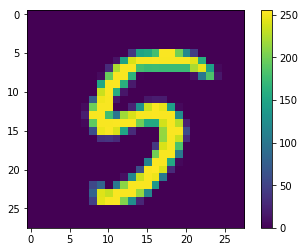

In [11]:
plt.figure()
plt.imshow(train_images[8])
plt.colorbar()
plt.grid(False)

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

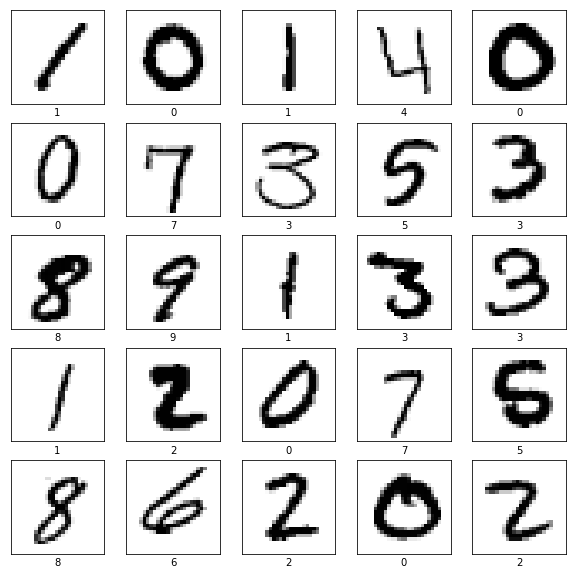

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

### Build the model

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [15]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
42000/42000 [==============================] - 5s 128us/step - loss: 0.2958 - acc: 0.9160
Epoch 2/5
42000/42000 [==============================] - 5s 122us/step - loss: 0.1348 - acc: 0.9610
Epoch 3/5
42000/42000 [==============================] - 5s 129us/step - loss: 0.0926 - acc: 0.9725
Epoch 4/5
42000/42000 [==============================] - 5s 121us/step - loss: 0.0712 - acc: 0.9780
Epoch 5/5
42000/42000 [==============================] - 5s 121us/step - loss: 0.0538 - acc: 0.9843


### Predition and Submission

In [17]:
pred_labels = model.predict_classes(test_images)

In [18]:
sub = pd.DataFrame({'ImageId': np.arange(1, 28001), 'Label': pred_labels})

In [19]:
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [20]:
sub.to_csv('keras.csv', index = False)

** Score on Kaggle 97.2%**
<img src="digit-recognizer.PNG" style="width:900px;height:300px;">